---
![kku-logo.svg](attachment:kku-logo.svg)

<div align="center">
    
# Department of Information system
## College of Computer science, King Khalid University
## Abha, Kingdom of Saudi Arabia
## Academic Year 2022-2023 Semester 2
### Machine Learning Assignment 2 part 2
    
</div>


---

# Classification

### Importing libraries & data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sns.set()



In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#see how many rows and columns
rows = len(df.axes[0])
col = len(df.axes[1])
print("number of rows = ",rows)
print("number of columns = ",col)


number of rows =  7043
number of columns =  21


In [ ]:
# information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 No missing value in data but have two features that need to change their type

In [ ]:
# is binary Categorical Variables
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [ ]:
#convert the TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df.TotalCharges,errors='coerce')
#convert the SeniorCitizen to object
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [ ]:
#check if convert corrctly
TotalCharges= df.dtypes['TotalCharges']
print('TotalCharges type ',TotalCharges)
SeniorCitizen= df.dtypes['SeniorCitizen']
print('SeniorCitizen type ',SeniorCitizen)


TotalCharges type  float64
SeniorCitizen type  object


### For each continuous kindly visualize the univariate distribution. Visualize the distribution of the target. Have you found something that need to be treated?

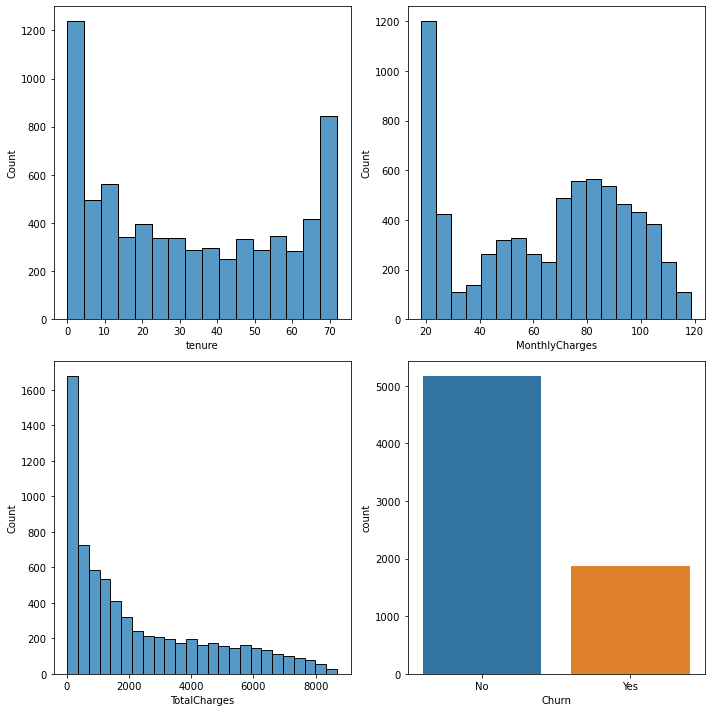

In [ ]:
#plot continuous variables using seborn
plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
sns.histplot(data=df, x='tenure', ax=ax1)
ax2 = plt.subplot(2,2,2)
sns.histplot(data=df, x='MonthlyCharges', ax=ax2)
ax3 = plt.subplot(2,2,3)
sns.histplot(data=df, x='TotalCharges', ax=ax3)
ax4 = plt.subplot(2,2,4)
sns.countplot(data=df, x='Churn', ax=ax4)
plt.tight_layout()

 Yes, all continuous features need to treat also; the target (Churn) needs to treat it is an imbalanced class

### Divide data into training and test set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Churn',axis=1)
X

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [ ]:
y = df['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

 ### Create a pipeline for working with categorical variables.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector


In [ ]:
# select categorical columns
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(X_train)

In [ ]:
# apply column transformer on categorical_columns
preprocess = make_column_transformer((make_pipeline(SimpleImputer(strategy='most_frequent'),
                   OneHotEncoder(handle_unknown='ignore', sparse=False)), categorical_columns))

### Using cross-validation, evaluate nearest centroids, Logistic Regression and linear support vector machines. Are the results different?

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors.nearest_centroid import NearestCentroid
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# create Pipeline for each models
model1 = make_pipeline(preprocess, LogisticRegression(solver='liblinear'))
model2 = make_pipeline(preprocess, LinearSVC())
model3 = make_pipeline(preprocess, NearestCentroid())

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Accuracy mean score for models
logisticScores = cross_val_score(model1, X_train, y_train , cv=5)
print("logisticScores",logisticScores.mean())
linearSVCScores = cross_val_score(model2, X_train, y_train , cv=5)
print('linearSVCScores',linearSVCScores.mean())
NearestCentroidScores = cross_val_score(model3, X_train, y_train , cv=5)
print('NearestCentroidScores',NearestCentroidScores.mean())

logisticScores 0.7850905218317358
linearSVCScores 0.7855165069222577
NearestCentroidScores 0.7052183173588925


There is no big difference between logistic regression and linear support vector machines. Nearest centroids has the least score

### Do you think scaling the continuous features with StandardScaler affect the results?

In [ ]:
# select the numrical colums
numerical_columns_selector = selector(dtype_exclude=object)
numerical_columns = numerical_columns_selector(X_train)

In [ ]:
# apply column transformer on numerical_columns and categorical_columns
preprocess = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy='mean'),
                   StandardScaler()), numerical_columns),
    (make_pipeline(SimpleImputer(strategy='most_frequent'),
                   OneHotEncoder(handle_unknown='ignore', sparse=False)), categorical_columns),
    remainder='passthrough'
)

In [ ]:
# create Pipeline for each models after StandardScaler
model1 = make_pipeline(preprocess, LogisticRegression(solver='liblinear'))
model2 = make_pipeline(preprocess, LinearSVC())
model3 = make_pipeline(preprocess, NearestCentroid())

In [ ]:
# Accuracy mean score for models after scaling

logisticScores = cross_val_score(model1, X_train, y_train , cv=5)
print("logisticScores",logisticScores.mean())
linearSVCScores = cross_val_score(model2, X_train, y_train , cv=5)
print('linearSVCScores',linearSVCScores.mean())
NearestCentroidScores = cross_val_score(model3, X_train, y_train , cv=5)
print('NearestCentroidScores',NearestCentroidScores.mean())

logisticScores 0.8017039403620874
linearSVCScores 0.7993610223642172
NearestCentroidScores 0.7378061767838127


After scaling  the numerical columns the score of LogisticRegression and linear support vector machines and nearest centroids become better but still nearest centroids the least     

### By Tuning the parameters of the models using GridSearchCV the results might improve. Approve it?

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# assign parameters for logistic regression
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid

{'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
#Tuning the logistic regression  model by enter different parameter
grid_search_logistic = GridSearchCV(model1, param_grid, cv=5,return_train_score=True)
# fit model
grid_search_logistic.fit(X_train, y_train)
# result of average score
grid_search_logistic.score(X_test, y_test)

0.8019591141396933

In [ ]:
# result of best parameter
grid_search_logistic.best_params_

{'logisticregression__C': 0.01}

In [ ]:
# result of best score
grid_search_logistic.best_score_

0.8048988285410011

In [ ]:
# assign parameters for linearsvc
param_grid = {'linearsvc__C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid

{'linearsvc__C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
#Tuning the linearSVC  model
grid_search_SVC = GridSearchCV(model2, param_grid, cv=5, return_train_score=True)
grid_search_SVC.fit(X_train, y_train)
grid_search_SVC.score(X_test, y_test)

0.8019591141396933

In [ ]:
grid_search_SVC.best_params_

{'linearsvc__C': 0.001}

In [ ]:
grid_search_SVC.best_score_

0.8031948881789137

In [ ]:
# assign parameters for Nearestcentroid
param_grid = {'nearestcentroid__shrink_threshold': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid

{'nearestcentroid__shrink_threshold': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
#Tuning the Nearestcentroid  model
grid_search_nearestcentroid = GridSearchCV(model3, param_grid, cv=5 ,return_train_score=True)
grid_search_nearestcentroid.fit(X_train, y_train)
grid_search_nearestcentroid.score(X_test, y_test)

0.7291311754684838

In [ ]:
grid_search_nearestcentroid.best_params_

{'nearestcentroid__shrink_threshold': 0.1}

In [ ]:
grid_search_nearestcentroid.best_score_

0.7380191693290735

The resulting score of logistic regression changed from 0.8017 to 0.8048, and linear support vector machines resulted from form 0,799 to 0.8031 finally Nearest centroids result from 0.737 to 0.738.

### Plot the performance as function of the parameters for nearest centroids, Logistic Regression and linear support vector machines.

In [ ]:
#get lists of mean_train_score and mean_test_score
def plot_parameter(grid_search_):
    param_grid= [0.001, 0.01, 0.1, 1, 10, 100]
    train_score = grid_search_.cv_results_['mean_train_score']
    test_score = grid_search_.cv_results_['mean_test_score']

#Plot graph
    fig= plt.figure(figsize=(8,5))
    plt.plot(param_grid, train_score,
         label = 'mean_train_score')
    plt.plot(param_grid, test_score,
         label = 'mean_test_score')
    plt.legend()
    plt.xlabel('C')
    plt.ylabel('score')
    plt.title('Performance Scores by Parametres (C)')
    plt.show()



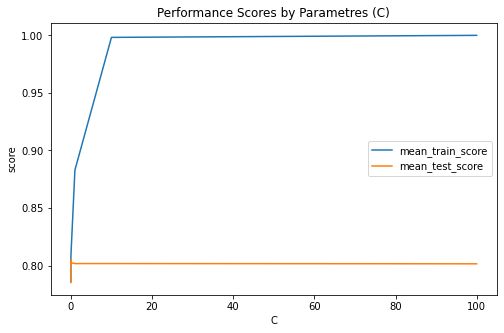

In [ ]:
plot_parameter(grid_search_logistic)

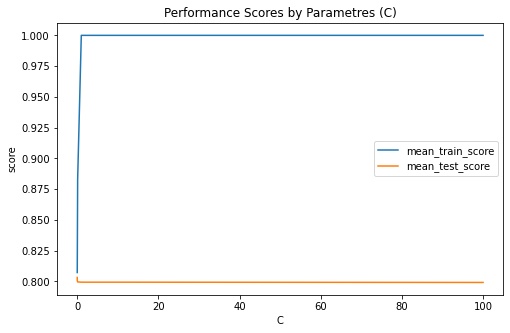

In [ ]:
plot_parameter(grid_search_SVC)

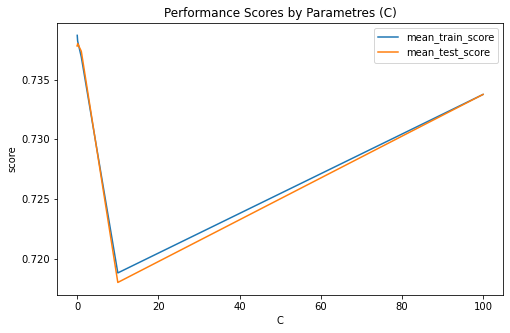

In [ ]:
plot_parameter(grid_search_nearestcentroid)

### Do you think the parameters that are found change if we change the cross-validation strategy from ‘stratified k-fold’ to ‘kfold’ with shuffling.

In [ ]:
# import the StratifiedKFold KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [ ]:
# Assign the number of split and shuffle to two stratege
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
kFold = KFold(n_splits=10, shuffle=True, random_state=1)

In [ ]:
# apply the stratified k-fold on logistic regression
# assign parameters for logistic regression  model
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_logistic = GridSearchCV(model1, param_grid, cv=skf,return_train_score=True)
# fit model
grid_search_logistic.fit(X_train, y_train)
# result of average score
print(grid_search_logistic.score(X_test, y_test))
# result of best parameter
print(grid_search_logistic.best_params_)
# result of best score
print(grid_search_logistic.best_score_)

0.8019591141396933
{'logisticregression__C': 1}
0.8057505784149164


In [ ]:
# apply the stratified k-fold on Linearsvc
## assign parameters for Linearsvc  model
param_grid = {'linearsvc__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_SVC = GridSearchCV(model2, param_grid, cv=skf, return_train_score=True)
grid_search_SVC.fit(X_train, y_train)
print(grid_search_SVC.score(X_test, y_test))
print(grid_search_SVC.best_params_)
print(grid_search_SVC.best_score_)

0.8019591141396933
{'linearsvc__C': 0.001}
0.8034124211767908


In [ ]:
# apply the stratified k-fold on Nearestcentroid
# assign parameters for Nearestcentroid  model
param_grid = {'nearestcentroid__shrink_threshold': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_nearestcentroid = GridSearchCV(model3, param_grid, cv=skf ,return_train_score=True)
grid_search_nearestcentroid.fit(X_train, y_train)
print(grid_search_nearestcentroid.score(X_test, y_test))
print(grid_search_nearestcentroid.best_params_)
print(grid_search_nearestcentroid.best_score_)

0.729557069846678
{'nearestcentroid__shrink_threshold': 0.001}
0.7380179648868122


In [ ]:
# apply the k-fold on logistic regression
# assign parameters for logistic regression  model
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_logistic = GridSearchCV(model1, param_grid, cv=kFold,return_train_score=True)
grid_search_logistic.fit(X_train, y_train)
print(grid_search_logistic.score(X_test, y_test))
print(grid_search_logistic.best_params_)
print(grid_search_logistic.best_score_)

0.8019591141396933
{'logisticregression__C': 1}
0.8068212130835185


In [ ]:
# apply the k-fold on Linearsvc
## assign parameters for Linearsvc  model
param_grid = {'linearsvc__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_SVC = GridSearchCV(model2, param_grid, cv=kFold, return_train_score=True)
grid_search_SVC.fit(X_train, y_train)
print(grid_search_SVC.score(X_test, y_test))
print(grid_search_SVC.best_params_)
print(grid_search_SVC.best_score_)

0.8057921635434412
{'linearsvc__C': 0.1}
0.8040548019779521


In [ ]:
# apply the k-fold on Nearestcentroid
# assign parameters for Nearestcentroid  model
param_grid = {'nearestcentroid__shrink_threshold': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_nearestcentroid = GridSearchCV(model3, param_grid, cv=kFold ,return_train_score=True)
grid_search_nearestcentroid.fit(X_train, y_train)
print(grid_search_nearestcentroid.score(X_test, y_test))
print(grid_search_nearestcentroid.best_params_)
print(grid_search_nearestcentroid.best_score_)

0.729557069846678
{'nearestcentroid__shrink_threshold': 0.001}
0.738438506555369


Yes I think it is a little change . As we see, the parameter of linear support vector machines change, and nearest centroids and Logistic Regression do not change

### Using hyper-parameters that showed good results in the gridsearch, visualize the coefficients for Linear Support Vector Machines and Logistic Regression

In [ ]:
# best parameters from gridsearch
best_param_SVM=grid_search_SVC.best_params_
best_param_SVM

{'linearsvc__C': 0.001}

In [ ]:
# pipline contain preprocess and  LinearSVC with best parameter model
pipe = Pipeline(steps=[("scaler", preprocess), ("svm", LinearSVC(C = 0.001))])

In [ ]:
# fit the model
c=pipe.fit(X_train, y_train)

# get the coefficients
coef=c.named_steps['svm'].coef_
coef

array([[-0.18145487,  0.11652331, -0.10455316, ..., -0.06697159,
         0.07714466, -0.0456226 ]])

Text(0.5, 1.0, 'Coefficients of Linear Support Vector Machines')

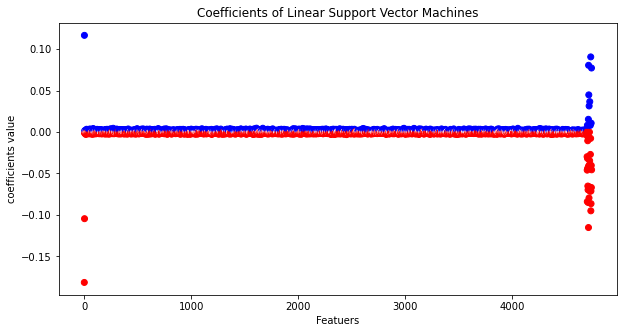

In [ ]:
#Plot graph
fig= plt.figure(figsize=(10,5))
# plot x = Featuers  , y=coefficients value for every Featuers
# for positive coefficients blue color and negative coefficients red color
#coef.shape[1] = columns of featuers
plt.scatter(range(coef.shape[1]),coef,c=np.sign(coef), cmap="bwr_r")
plt.xlabel('Featuers')
plt.ylabel('coefficients value')
plt.title('Coefficients of Linear Support Vector Machines')

In [ ]:
# best parameters from gridsearch
best_param_logistic=grid_search_logistic.best_params_
best_param_logistic

{'logisticregression__C': 0.01}

In [ ]:
# pipline contain preprocess and  LogisticRegression with best parameter model
pipe1 = Pipeline(steps=[("scaler", preprocess), ("logistic", LogisticRegression(C =0.01))])

In [ ]:
# fit the model
c=pipe1.fit(X_train, y_train)

# get the coefficients
coef1=c.named_steps['logistic'].coef_
coef1

array([[-0.59441608,  0.26010682, -0.17000431, ..., -0.14137527,
         0.2467913 , -0.04072039]])

Text(0.5, 1.0, 'Coefficients of Logistic Regression')

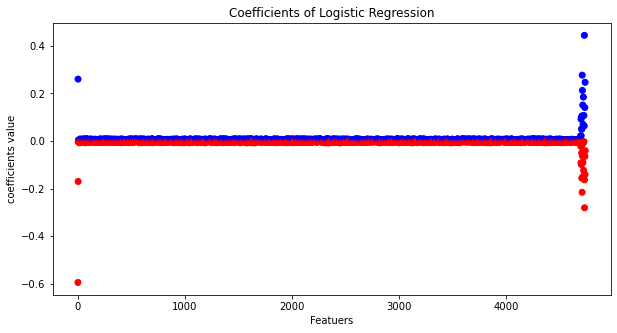

In [ ]:
#Plot graph
fig= plt.figure(figsize=(10,5))
# plot x =Featuers , y=coefficients value for every Featuers
# for positive coefficients blue color and negative coefficients red color
#coef.shape[1] = columns of featuers
plt.scatter(range(coef1.shape[1]),coef1,c=np.sign(coef1), cmap="bwr_r")
plt.xlabel('Featuers')
plt.ylabel('coefficients value')
plt.title('Coefficients of Logistic Regression')